IMDbMovieRatingPrediction

In [30]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

In [32]:
# Load dataset
df = pd.read_csv("IMDb Movies India.csv", encoding='ISO-8859-1')

In [34]:
df[:5]

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
0,,NaN,NaN,Drama,NaN,NaN,J.S. Randhawa,Manmauji,Birbal,Rajendra Bhatia
1,#Gadhvi (He thought he was Gandhi),(2019),109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
2,#Homecoming,(2021),90 min,"Drama, Musical",NaN,NaN,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana
3,#Yaaram,(2019),110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
4,...And Once Again,(2010),105 min,Drama,NaN,NaN,Amol Palekar,Rajat Kapoor,Rituparna Sengupta,Antara Mali


In [36]:
# Drop rows with missing target
df = df[df['Rating'].notna()]

# Clean and preprocess

In [39]:

# 1. Convert 'Votes' to numeric
df['Votes'] = df['Votes'].str.replace(',', '', regex=False)
df['Votes'] = pd.to_numeric(df['Votes'], errors='coerce')

# 2. Clean 'Year' to extract year
df['Year'] = df['Year'].str.extract(r'(\d{4})')
df['Year'] = pd.to_numeric(df['Year'], errors='coerce')

# 3. Convert 'Duration' to numeric (drop " min")
df['Duration'] = df['Duration'].str.replace(' min', '', regex=False)
df['Duration'] = pd.to_numeric(df['Duration'], errors='coerce')

# Drop rows with critical missing features
df.dropna(subset=['Year', 'Duration', 'Votes', 'Director', 'Actor 1'], inplace=True)


In [41]:
# Encode categorical features
for col in ['Director', 'Actor 1', 'Actor 2', 'Actor 3']:
    df[col] = LabelEncoder().fit_transform(df[col].astype(str))


In [43]:
df['Genre'] = df['Genre'].fillna('Unknown')
df['Genre'] = df['Genre'].apply(lambda x: x.split(',')[0] if isinstance(x, str) else 'Unknown')
df['Genre'] = LabelEncoder().fit_transform(df['Genre'])

In [45]:
# Select features and target
features = ['Year', 'Duration', 'Votes', 'Director', 'Actor 1', 'Actor 2', 'Actor 3', 'Genre']
X = df[features]
y = df['Rating']

In [47]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [49]:
# Model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [51]:
# Predictions
y_pred = model.predict(X_test)


In [53]:
# Evaluation
print("R2 Score:", r2_score(y_test, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))

R2 Score: 0.373190256114312
RMSE: 1.1061597332828257


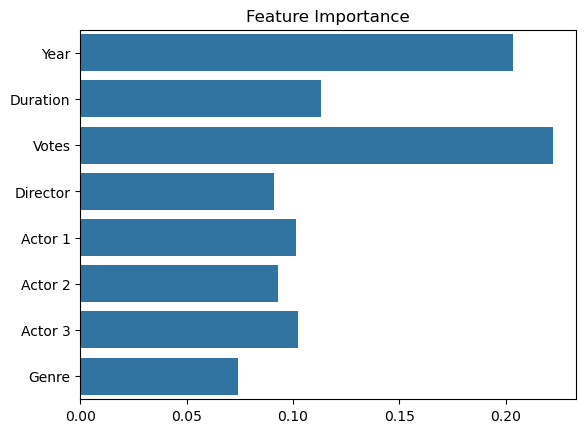

In [55]:
# Feature importance
importances = model.feature_importances_
sns.barplot(x=importances, y=features)
plt.title("Feature Importance")
plt.show()